In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils
from datetime import datetime

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

In [86]:
def check_excess_event(hhs, bc, thr=1500):
    no_excess_events = np.full(shape=hhs.shape[0:2], fill_value=True)
    for i, _hh_file in enumerate(hhs):
        for j, _hh in enumerate(_hh_file):
            if np.sum(_hh[bc > thr]) > 1 or np.sum(_hh) < 50:
                no_excess_events[i, j] = False

    return no_excess_events

def get_events_after_cut(hhs, bc, good_dets, no_excess_events, thr=4000):
    events_after_cut = []
    for i, _hh_file in enumerate(hhs):
        for j, _hh in enumerate(_hh_file):
            if not good_dets[i, j] or not no_excess_events[i, j]:
                continue
            n_large_events = np.sum(_hh[bc > thr])
            if n_large_events > 0:
                events_after_cut.append((i, j))
    return events_after_cut

In [207]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241110_10e_long'
data_prefix = r'20241110_abcdf_10e_'
bc_0, hhs_0, good_dets_0, temps_0 = utils.load_histograms(data_dir, data_prefix, 720)
no_excess_events_0 = check_excess_event(hhs_0, bc_0)

In [88]:
hh_all_sum_0 = np.sum(np.sum(hhs_0, axis=0), axis=0)
hh_cut_det_0 = hhs_0[good_dets_0]
hh_cut_all_0 = hhs_0[np.logical_and(good_dets_0, no_excess_events_0)]

hh_cut_det_sum_0 = np.sum(hh_cut_det_0, axis=0)
hh_cut_all_sum_0 = np.sum(hh_cut_all_0, axis=0)

Text(0.5, 1.0, '10e sphere data (12.0 hours), begins 2024-11-10 10:27:21.108436')

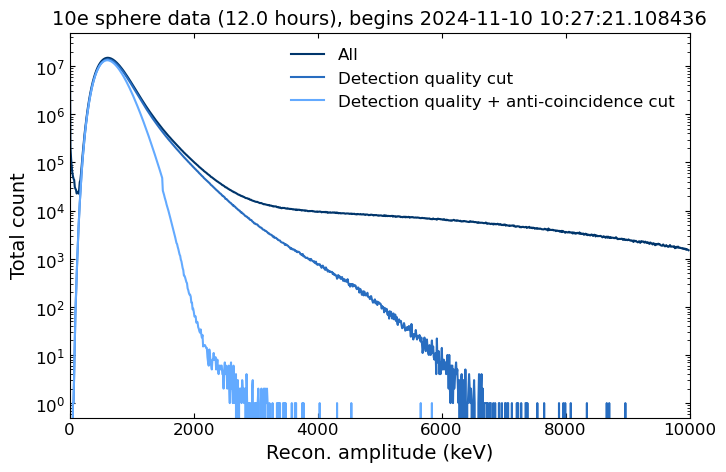

In [89]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_0, hh_all_sum_0, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_0, hh_cut_det_sum_0, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_0, hh_cut_all_sum_0, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'10e sphere data ({720/60:.1f} hours), begins {start_time}')

In [90]:
events_after_cut_0 = get_events_after_cut(hhs_0, bc_0, good_dets_0, no_excess_events_0, thr=2500)
print('Number of windows with large events (> 25000 keV): ', len(events_after_cut_0))

Number of windows with large events (> 25000 keV):  147


/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_157.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_167.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_178.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_188.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_189.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_206.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_208.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_209.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_230.hdf5
/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_239.hdf5


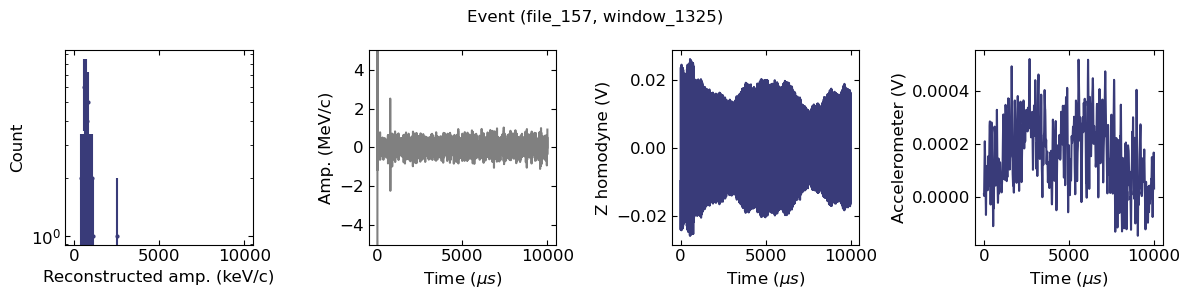

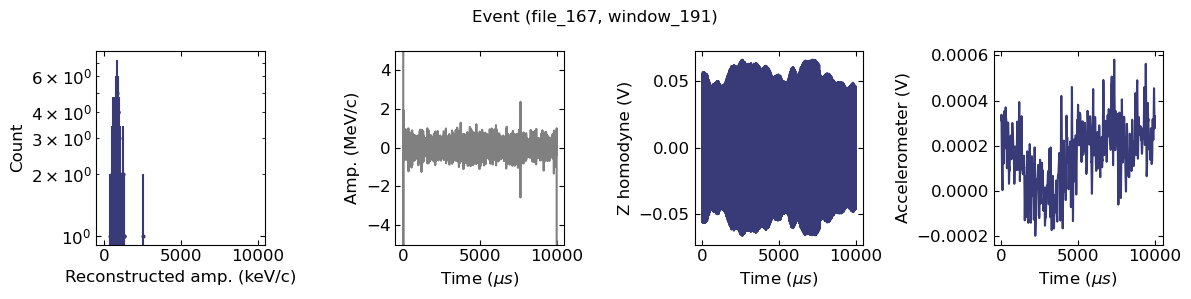

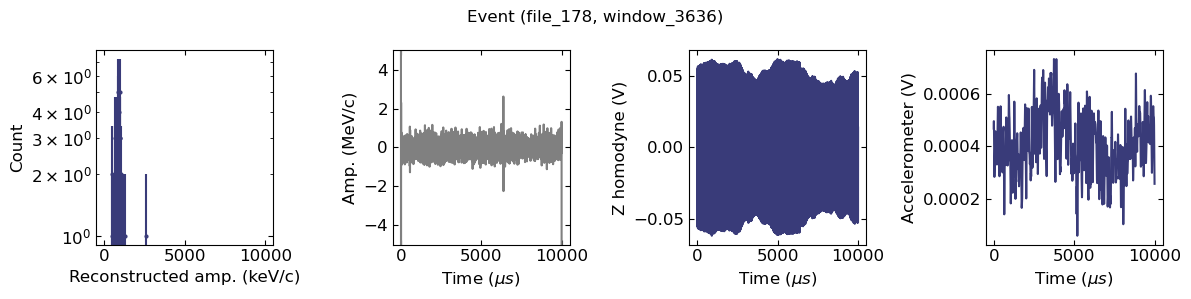

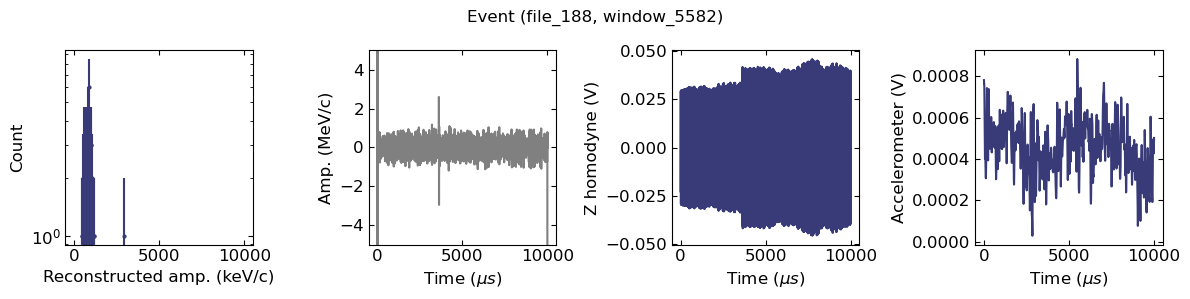

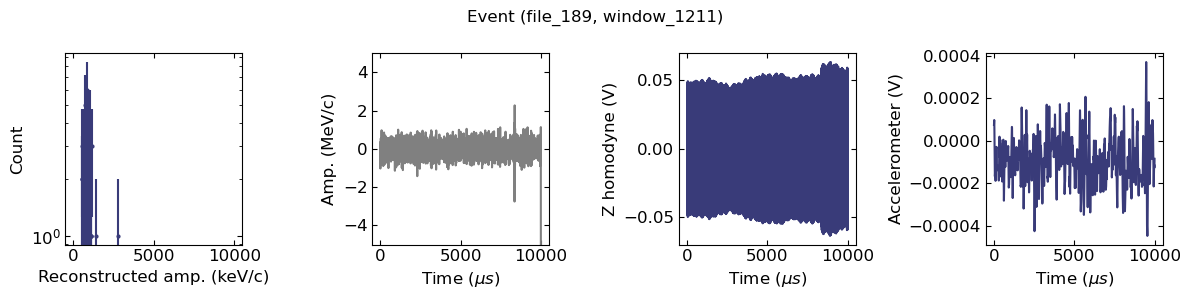

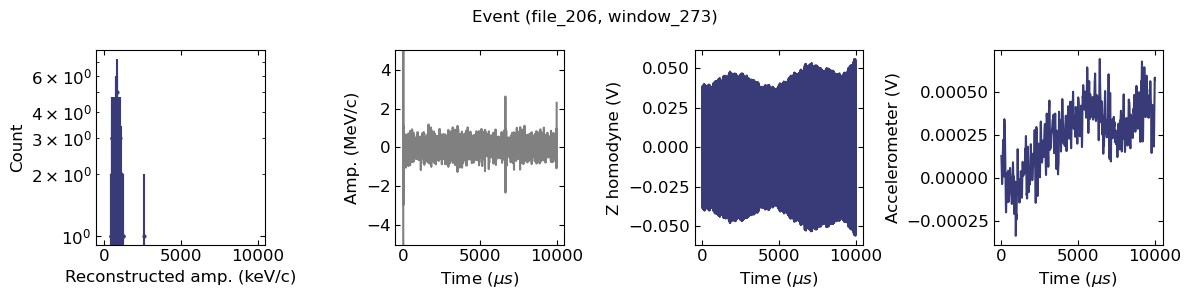

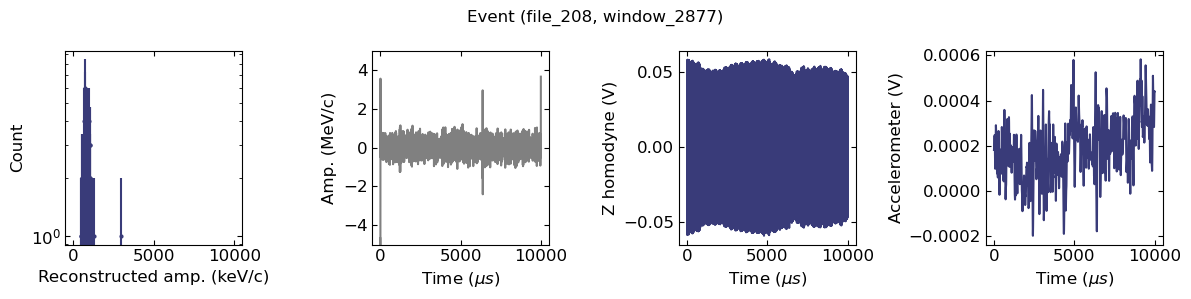

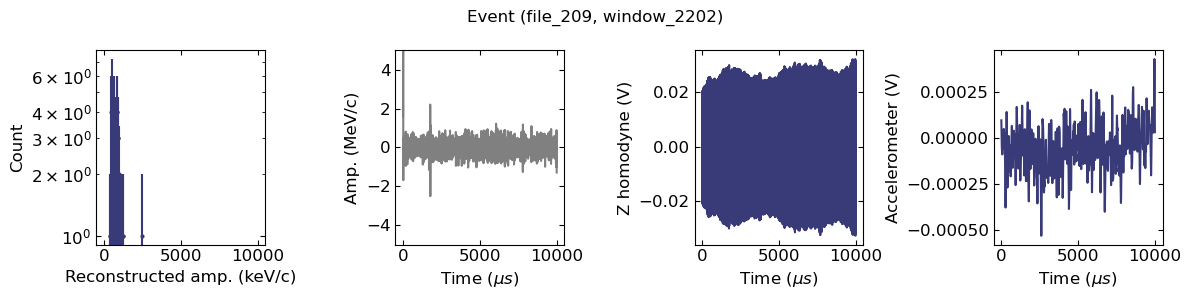

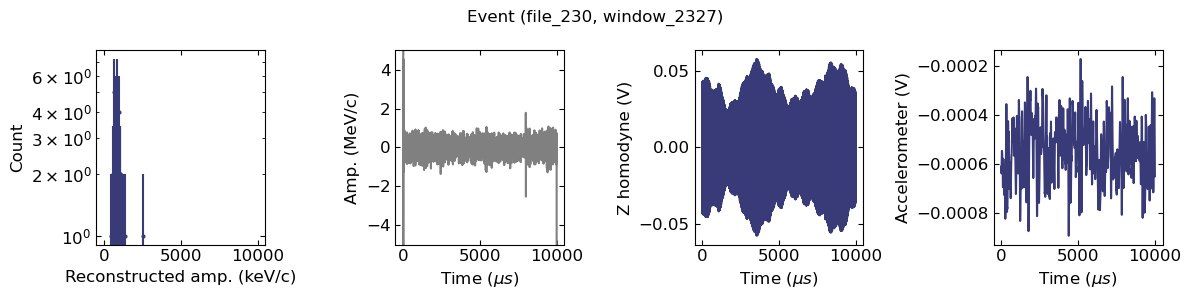

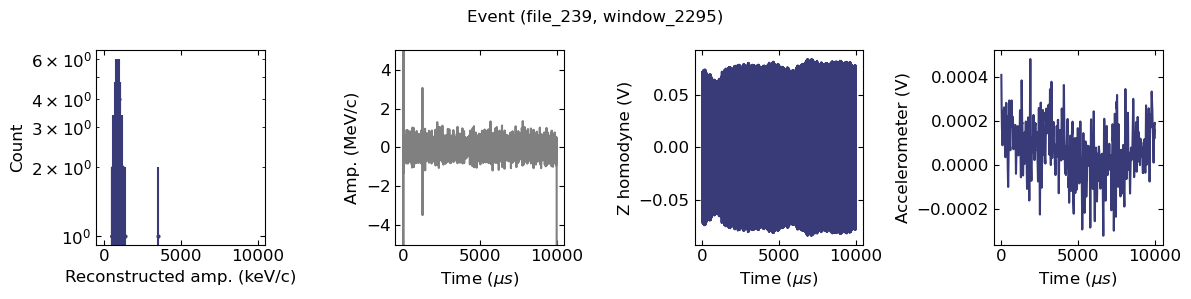

In [146]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241110_10e_long'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_0[20:30]:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

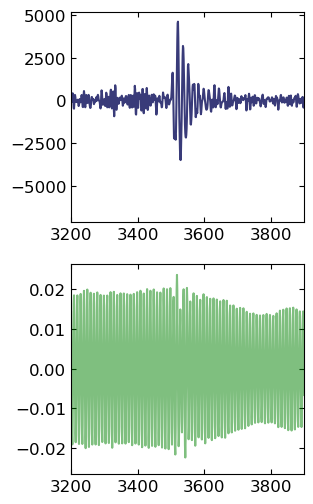

In [ ]:
# i, j = 25, 3360

fig, axes = plt.subplots(2, 1, figsize=(3, 6))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)

for ax in axes:
    ax.set_xlim(3200, 3900)

/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_189.hdf5


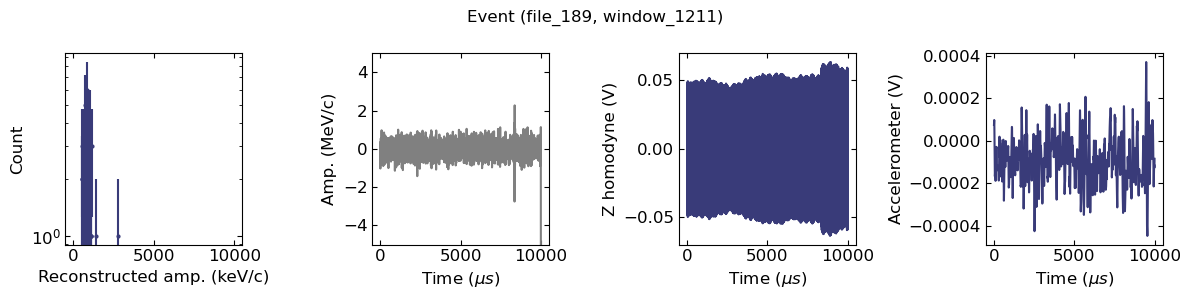

In [197]:
i, j = 189, 1211
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

(-5000.0, 5000.0)

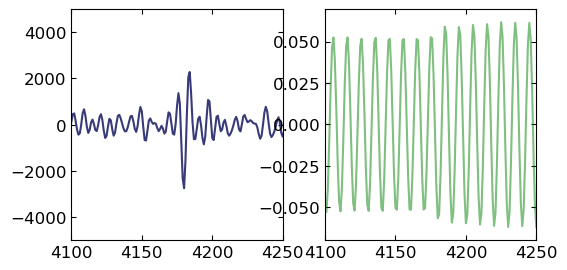

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)

for ax in axes:
    ax.set_xlim(4100, 4250)

axes[0].set_ylim(-5000, 5000)

/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_188.hdf5


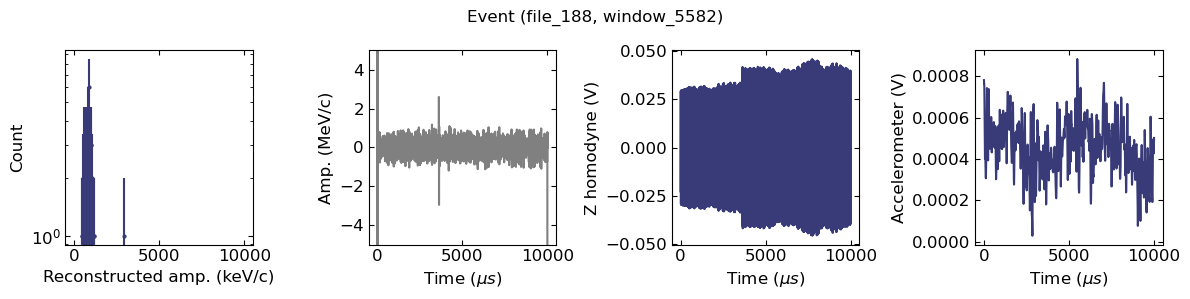

In [147]:
i, j = 188, 5582
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

(-5000.0, 5000.0)

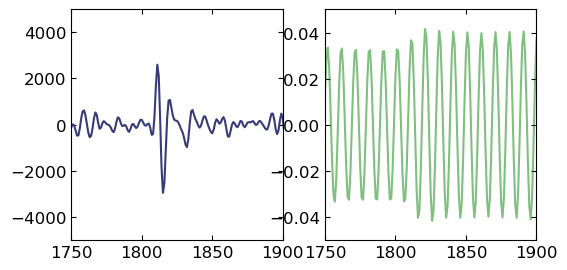

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)

for ax in axes:
    ax.set_xlim(1750, 1900)

axes[0].set_ylim(-5000, 5000)

In [190]:
f = h5py.File(rf'/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_{i}.hdf5', "r")

channel = 'c'
tt = f['data'][f'channel_{channel}'][:] * f['data'][f'channel_{channel}'].attrs['adc2mv'] / 1e3
tt_bp = utils.bandpass_filtered(tt, 500000, 45000, 55000)

reshaped = np.reshape(tt, (int(tt.size / window_length), window_length))
bp_reshaped = np.reshape(tt_bp, (int(tt_bp.size / window_length), window_length))


In [191]:
ttf = reshaped[j]
ttf_bp = bp_reshaped[j]

ampf, ampf_lp, temp = utils.recon_force(2e-6, ttf_bp, 1)

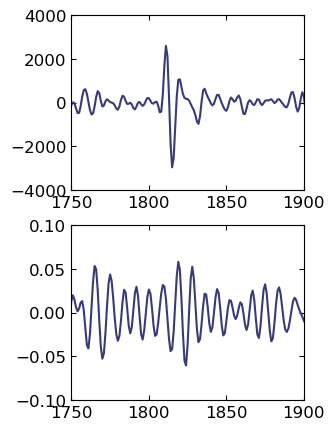

In [196]:
fig, axes = plt.subplots(2, 1, figsize=(3, 5))

# plt.plot(ttf)
axes[0].plot(amp_lp*amp2kev)
axes[1].plot(ampf_lp)

axes[0].set_ylim(-4000, 4000)
axes[1].set_ylim(-0.1, 0.1)

for ax in axes:
    ax.set_xlim(1750, 1900)


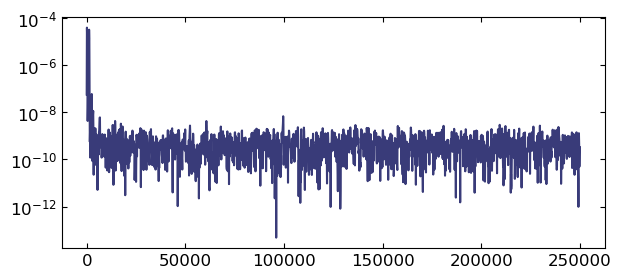

In [112]:
fff, ppf = utils.get_psd(dt=2e-6, zz=zzf, nperseg=2**12)
# ff1, pp1 = utils.get_psd(dt=2e-6, zz=zz, nperseg=2**10)

plt.plot(fff, ppf)
plt.yscale('log')

In [206]:
f.close()

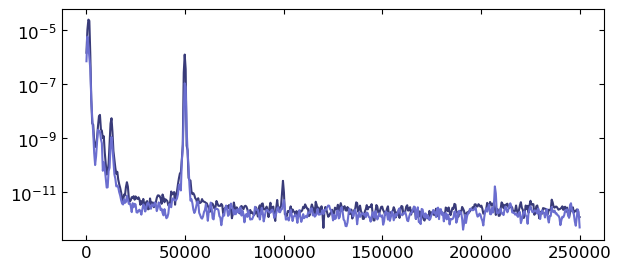

In [97]:
ff0, pp0 = utils.get_psd(dt=2e-6, zz=zz, nperseg=2**10)
# ff1, pp1 = utils.get_psd(dt=2e-6, zz=zz, nperseg=2**10)

plt.plot(ff0, pp0)
plt.plot(ff1, pp1)
plt.yscale('log')

/Volumes/LaCie/dm_data/20241110_10e_long/20241110_abcdf_10e_30.hdf5


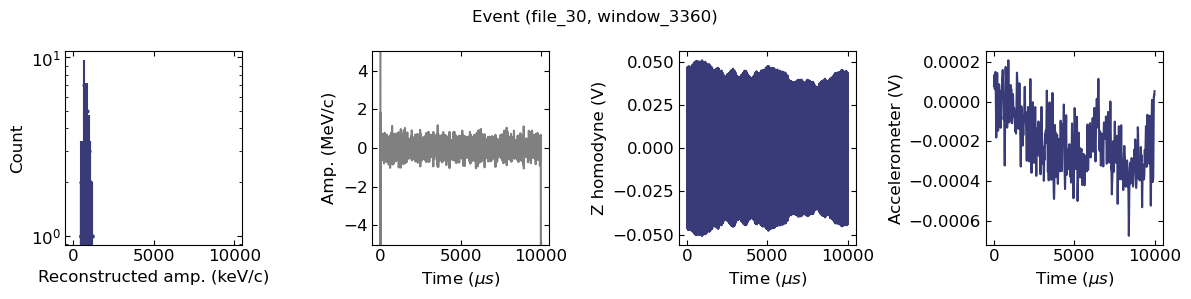

In [40]:
i, j = 30, 3360
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

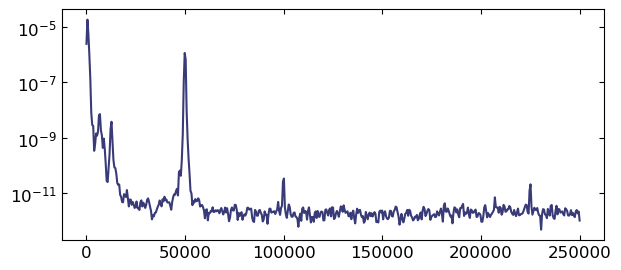

In [45]:
ff, pp = utils.get_psd(dt=2e-6, zz=zz, nperseg=2**10)

plt.plot(ff, pp)
plt.yscale('log')

## 30 minute data (with 2 feedback + microphone + accelerometer monitoring)

In [208]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241111_11e_30m'
data_prefix = r'20241111_defgh_11e_'
bc_1, hhs_1, good_dets_1, temps_1 = utils.load_histograms(data_dir, data_prefix, 30)
no_excess_events_1 = check_excess_event(hhs_1, bc_1)

In [209]:
hh_all_sum_1 = np.sum(np.sum(hhs_1, axis=0), axis=0)
hh_cut_det_1 = hhs_1[good_dets_1]
hh_cut_all_1 = hhs_1[np.logical_and(good_dets_1, no_excess_events_1)]

hh_cut_det_sum_1 = np.sum(hh_cut_det_1, axis=0)
hh_cut_all_sum_1 = np.sum(hh_cut_all_1, axis=0)

Text(0.5, 1.0, '11e sphere data (0.5 hours), begins 2024-11-11 14:41:57.829401')

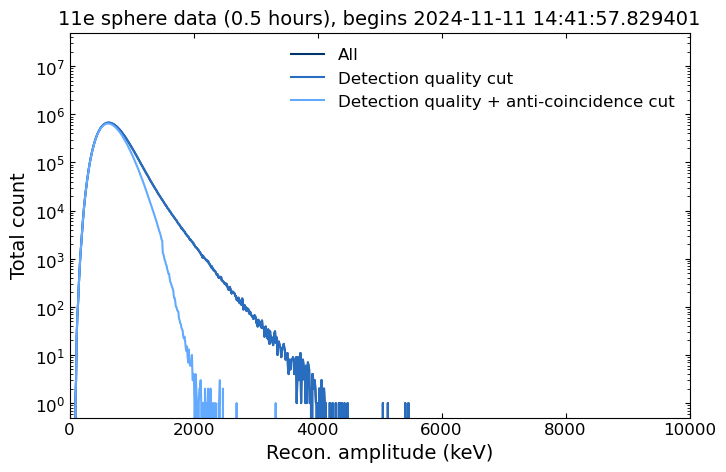

In [251]:
f = h5py.File(r'/Volumes/LaCie/dm_data/20241111_11e_30m/20241111_defgh_11e_0.hdf5', 'r')
start_time = str(datetime.fromtimestamp(f['data'].attrs['timestamp']))
f.close()

plt.subplots(figsize=(8, 5))
plt.plot(bc_0, hh_all_sum_1, '-', color=yale_colors[0], label='All', alpha=1)
plt.plot(bc_0, hh_cut_det_sum_1, '-', color=yale_colors[1], label='Detection quality cut', alpha=1)
plt.plot(bc_0, hh_cut_all_sum_1, '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)

plt.legend(frameon=False, fontsize=12)

plt.yscale('log')
plt.xlim(0, 10000)
plt.ylim(5e-1, 5e7)

plt.xlabel('Recon. amplitude (keV)')
plt.ylabel('Total count')
plt.title(f'11e sphere data ({30/60:.1f} hours), begins {start_time}')

In [213]:
events_after_cut_1 = get_events_after_cut(hhs_1, bc_1, good_dets_1, no_excess_events_1, thr=2500)
print('Number of windows with large events (> 2500 keV): ', len(events_after_cut_1))

Number of windows with large events (> 2500 keV):  2


/Volumes/LaCie/dm_data/20241111_11e_30m/20241111_defgh_11e_8.hdf5
/Volumes/LaCie/dm_data/20241111_11e_30m/20241111_defgh_11e_26.hdf5


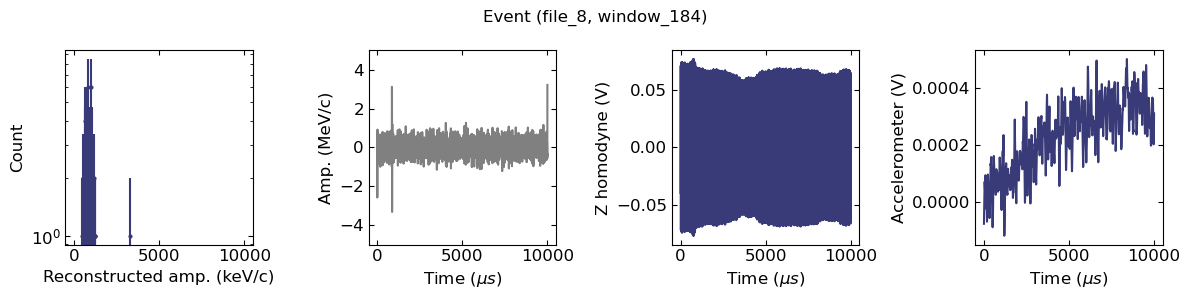

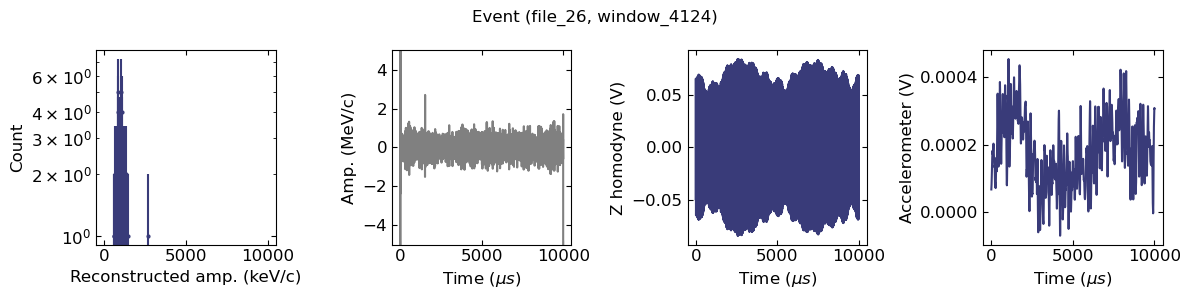

In [214]:
c_mv = 5.522e-08
amp2kev = 12953.113196358565

window_length = 5000
bins = np.arange(0, 10000, 10)
bc = 0.5 * (bins[:-1] + bins[1:])

data_dir = r'/Volumes/LaCie/dm_data/20241111_11e_30m'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

for i, j in events_after_cut_1:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

In [223]:
data_dir = r'/Volumes/LaCie/dm_data/20241111_11e_30m'
data_prefix = r'20241111_defgh_11e_'
window_length = 5000

def get_channel_window(i, j, data_dir, data_prefix, channel, window_length):
    file = os.path.join(data_dir, f'{data_prefix}{i}.hdf5')
    f = h5py.File(file, "r")
    tt = f['data'][f'channel_{channel}'][:] * f['data'][f'channel_{channel}'].attrs['adc2mv'] / 1e3
    reshaped = np.reshape(tt, (int(tt.size / window_length), window_length))
    f.close()

    return reshaped[j]

/Volumes/LaCie/dm_data/20241111_11e_30m/20241111_defgh_11e_8.hdf5


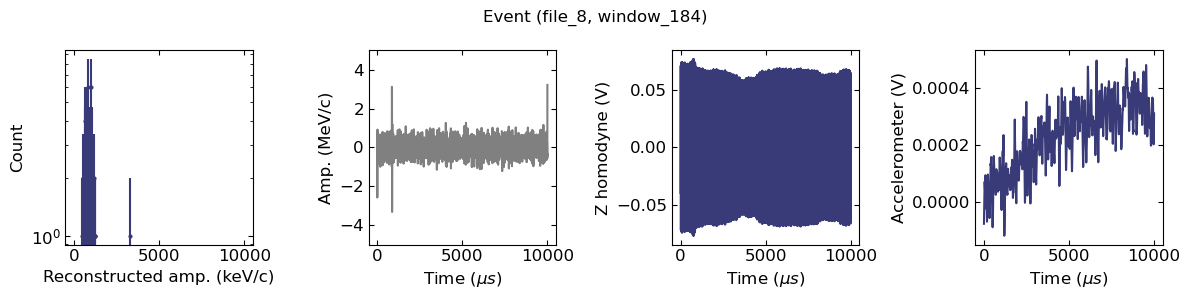

In [ ]:
i, j = 8, 184
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

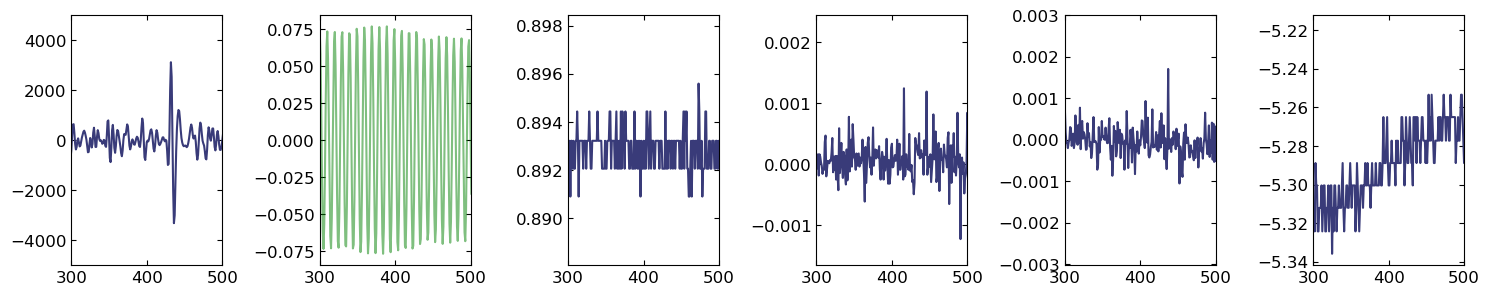

In [240]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)
axes[2].plot(get_channel_window(i, j, data_dir, data_prefix, 'e', window_length))
axes[3].plot(get_channel_window(i, j, data_dir, data_prefix, 'f', window_length))
axes[4].plot(get_channel_window(i, j, data_dir, data_prefix, 'g', window_length))
axes[5].plot(get_channel_window(i, j, data_dir, data_prefix, 'h', window_length))

for ax in axes:
    ax.set_xlim(300, 500)

axes[0].set_ylim(-5000, 5000)

fig.tight_layout()

/Volumes/LaCie/dm_data/20241111_11e_30m/20241111_defgh_11e_26.hdf5


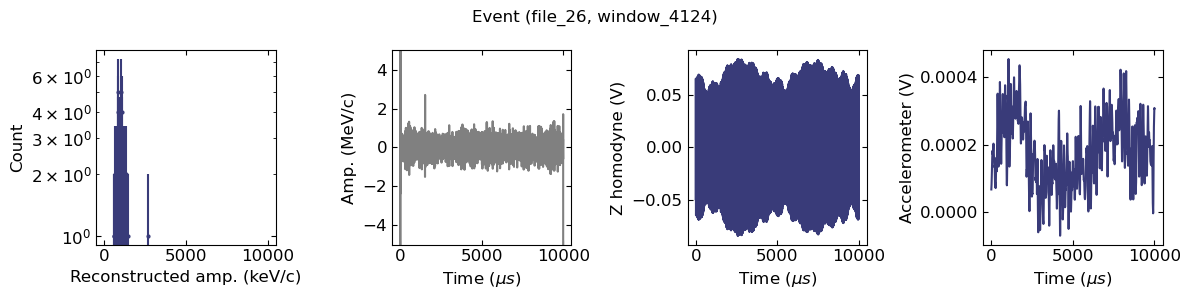

In [241]:
i, j = 26, 4124
amp_lp, hh, zz, zz_bp, fig, ax = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev)

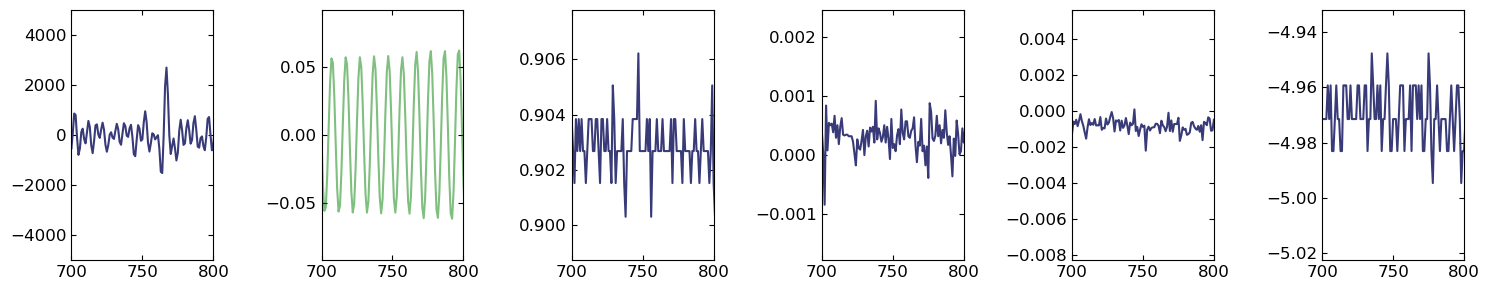

In [250]:
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

axes[0].plot(amp_lp*amp2kev)
axes[1].plot(zz_bp, color='green', alpha=0.5)
axes[2].plot(get_channel_window(i, j, data_dir, data_prefix, 'e', window_length))
axes[3].plot(get_channel_window(i, j, data_dir, data_prefix, 'f', window_length))
axes[4].plot(get_channel_window(i, j, data_dir, data_prefix, 'g', window_length))
axes[5].plot(get_channel_window(i, j, data_dir, data_prefix, 'h', window_length))

for ax in axes:
    ax.set_xlim(700, 800)

axes[0].set_ylim(-5000, 5000)

fig.tight_layout()

In [249]:
200 * 2e-6

0.00039999999999999996